# KDD Cup 2009
A conferência Knowledge Discovery and Data Mining (KDD) é uma das mais importantes em mineração de dados e aprendizado de máquina. E todo ano a KDD oferece uma competição de análise de dados. A KDD Cup, como ela é chamada, serviu de inspiração para o Prêmio do Netflix e competições do Kaggle.
Em 2009, o KDD Cup forneceu um conjunto de dados de gestão de relacionamento com o cliente. Esse tipo de dados é comumente conhecido como customer relationship management (CRM).  Foi disponibilizado 230 fatos sobre 50000 contas de cartão de crédito. Com esses atributos o objetivo era predizer o cancelamento da conta (churn), a tendência de usar novos produtos e serviços (appetency) e a propensão para comprar upgrades ou adicionais quando apresentados (up-selling). 
Seu objetivo neste exercício é criar um ou mais modelos para o problema do KDD Cup 2009: predição de churn, appetency e up-selling na versão small do dataset. Os critérios para avaliação do seu modelo é o mesmo que o da competição: AUC.

Antes de começar a processar os dados vamos importá-los e checar o seu estados. Queremos saber qual tipo de dados estamos lidando, se muitos valores estão em branco e qual tipo de pre-processamento devemos fazer.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import visualizer as viz
import utils

In [2]:
path = './data/'
features = pd.read_csv(path + 'orange_small_train.data', sep = '\t')
features.shape

(50000, 230)

In [3]:
numerical_features = features.iloc[:, 0:190].copy()
categorical_features = features.iloc[:, 190:].copy()

print('Shape of numerical features: {}\nShape of categorical features: {}'.format(numerical_features.shape, categorical_features.shape))

Shape of numerical features: (50000, 190)
Shape of categorical features: (50000, 40)


In [4]:
features.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [5]:
features.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


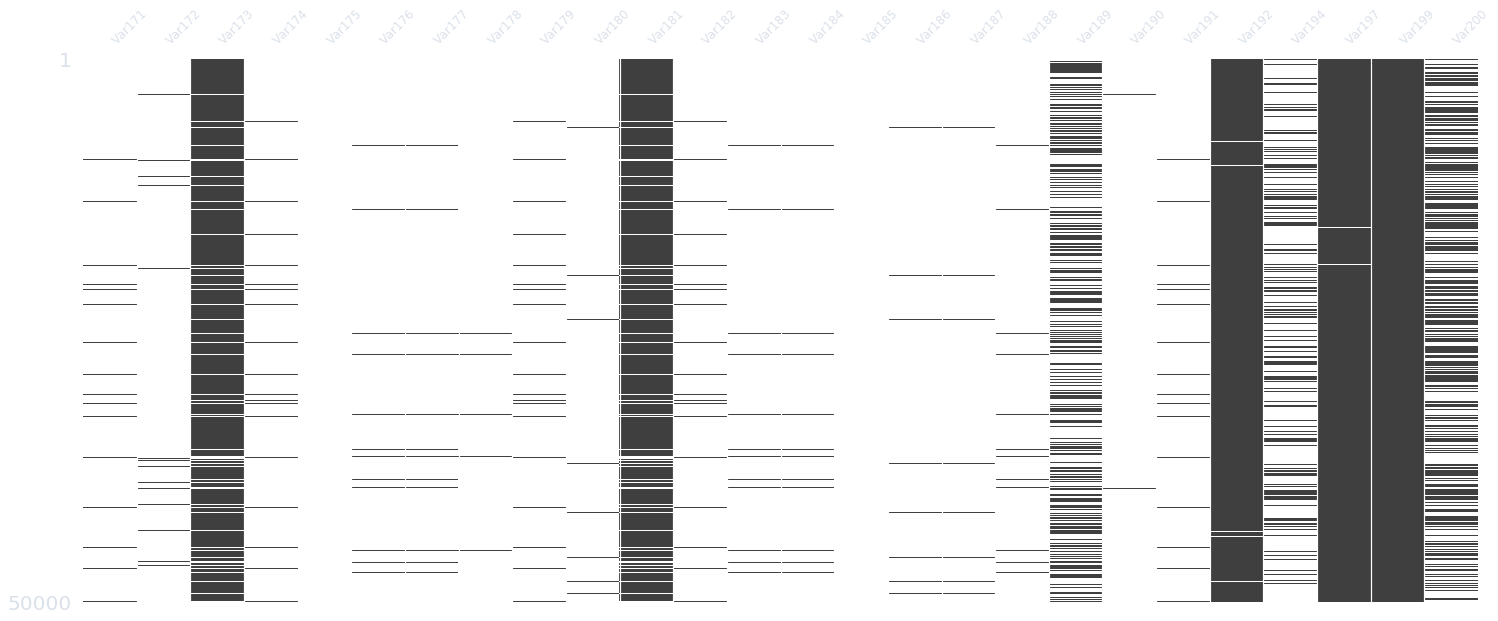

In [6]:
sample_df = features.iloc[:, 170:200].copy()
viz.plot_missing_matrix(sample_df)

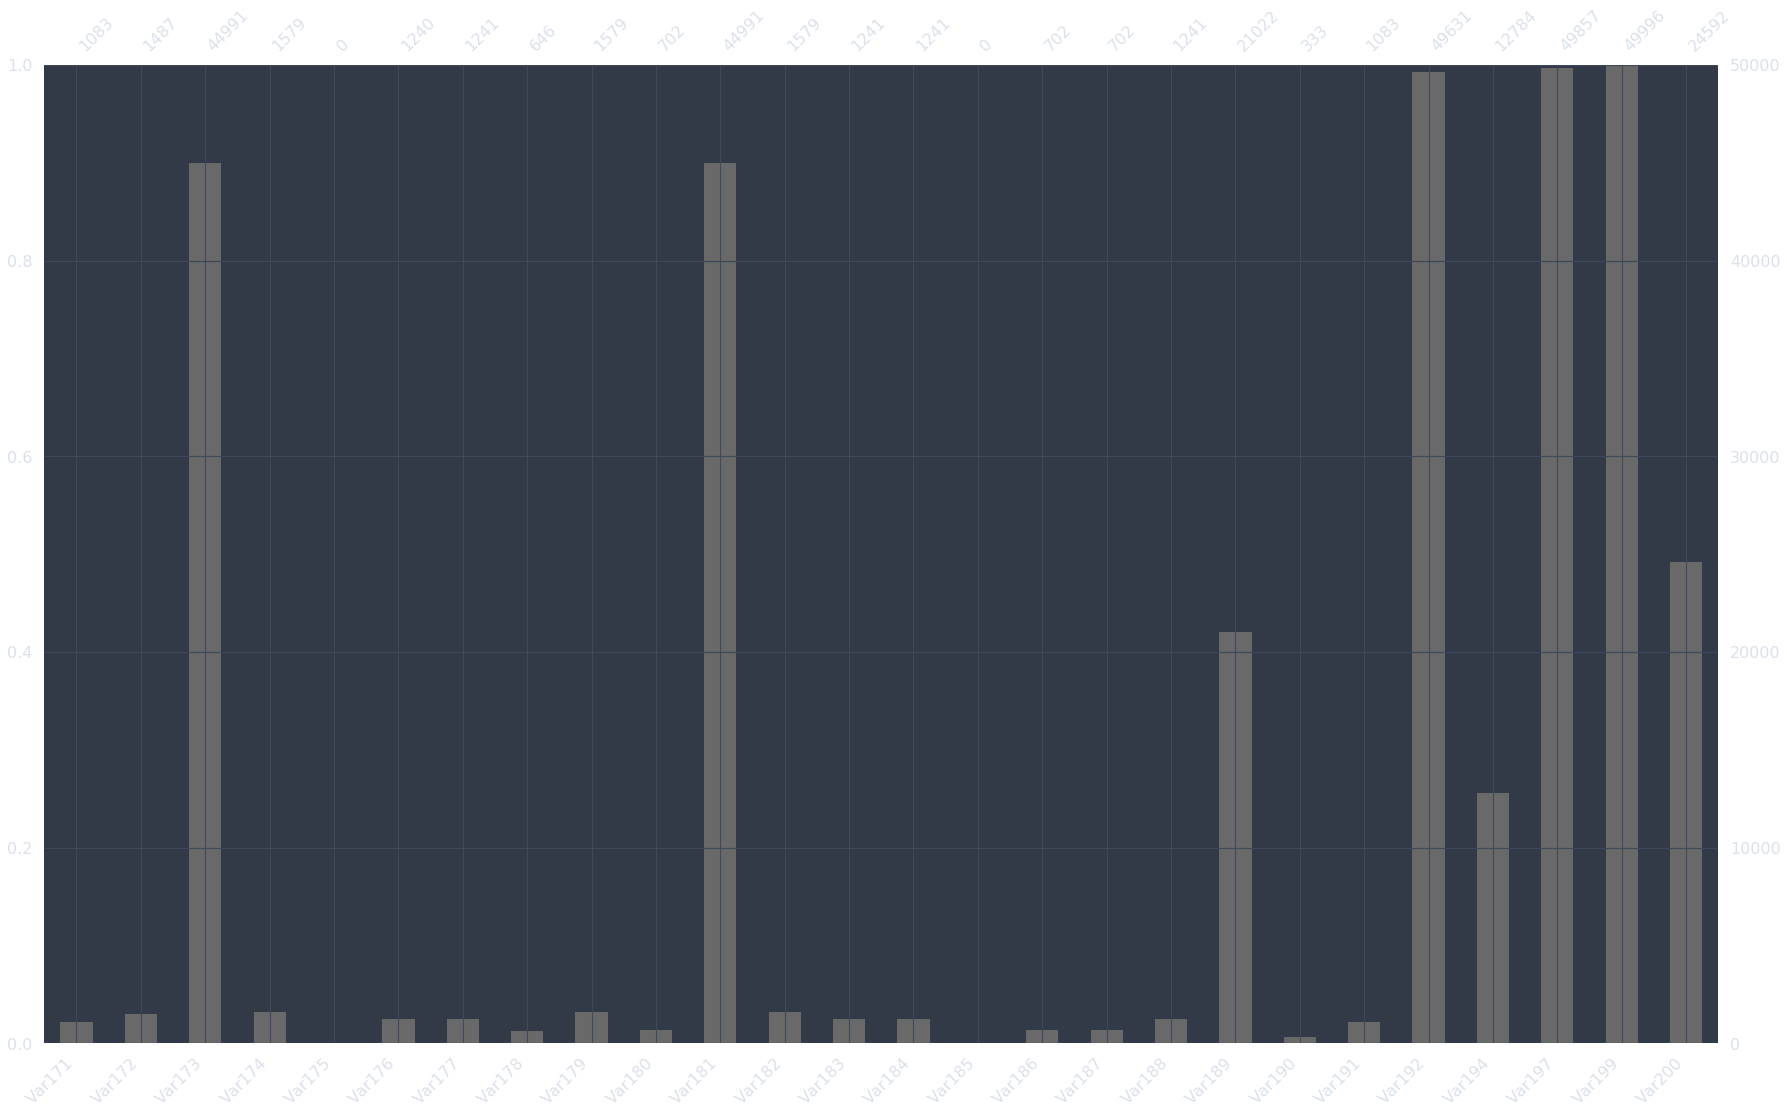

In [7]:
viz.plot_missing_bar(sample_df)

# Feature Importance
![features](https://media.giphy.com/media/c6J4HiJ8aNRSBrMYfH/giphy.gif)
Nem toda feature tem o mesmo impacto no modelo, por isso, vamos tentar descobrir quais features têm o maior impacto na predição.
Vamos fazer isso em 2 passos:

1. Remover variáveis com base no número valores distintos
2. Permutações de importância

As variáveis não existirem pode ser preditivo, mas vamos ignorar isso por enquanto e preencher o vazio com a média da instancia para features numericas e com a string 'missing' para as features categóricas (isso já é suficiente para predizer através do vazio)

(50000, 38)


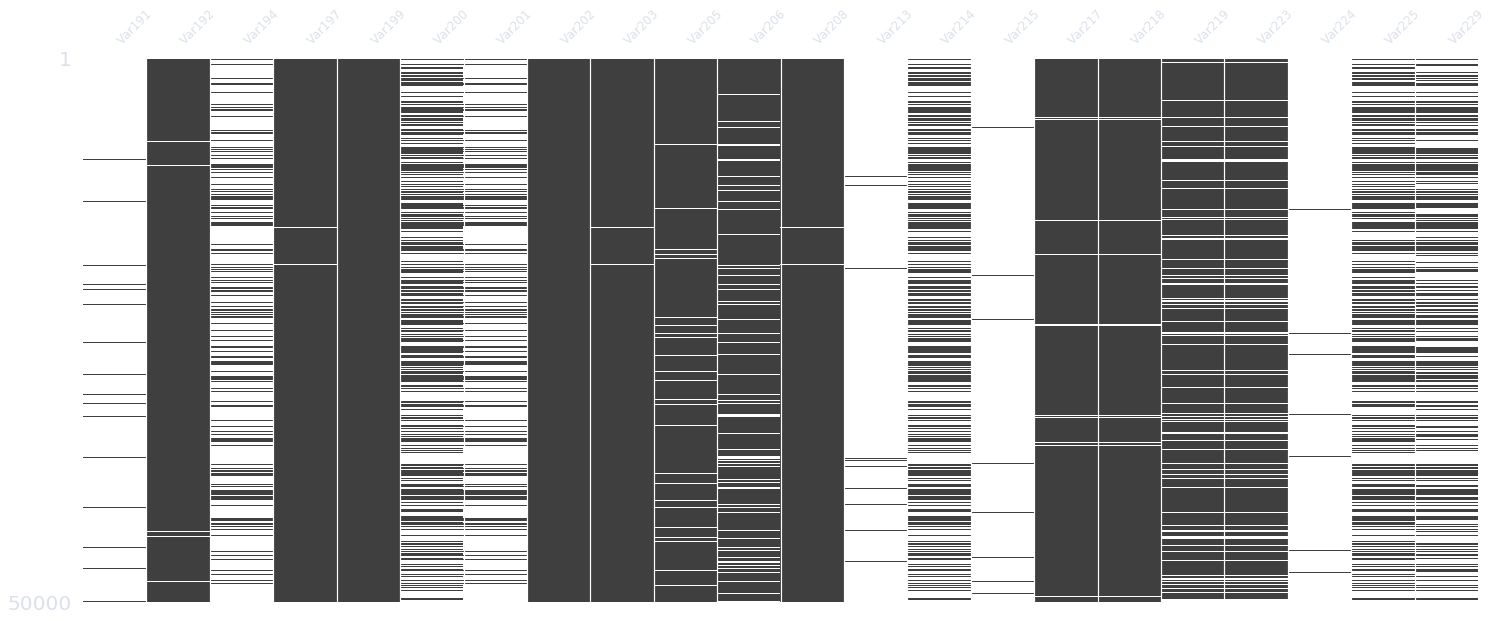

In [8]:
# Elimina as features que possuem o mesmo valor para todas as intâncias ou são exclusivamente nulas
categorical_features = utils.drop_min_unique_features(categorical_features, 1)

print(categorical_features.shape)
viz.plot_missing_matrix(categorical_features)

In [9]:
# Substitui vazio por 'missing'
categorical_features.fillna('missing', inplace=True)

categorical_features.astype('category', copy=False)

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,missing,bZkvyxLkBI,RO12,missing,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,missing,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,missing,missing,xb3V,RAYp,F2FyR07IdsN7I,missing
1,missing,CEat0G8rTN,RO12,missing,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,missing,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,missing,missing,fKCe,RAYp,F2FyR07IdsN7I,missing
2,missing,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,missing,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,missing,jg69tYsGvO,RO12,missing,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,missing,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,missing,missing,FSa2,RAYp,F2FyR07IdsN7I,missing
4,missing,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,missing,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
5,missing,m9SrEy7Rm6,2Knk1KF,missing,taul,1K8T,lK27,fayYfhR,etM739XNb0Rf0,missing,...,KbkKEj0,zCkv,QqVuch3,LM8l689qOp,missing,missing,Qcbd,02N6s8f,Zy3gnGM,am7c
6,missing,Qu0qrQKzJV,2Knk1KF,lvza,taul,1K8T,EJC9,ofiZR7x,LJF4fPp,QYxAlFM,...,JO03372,oslk,XlgxB9z,LM8l689qOp,missing,kG3k,FSa2,RAYp,55YFVY9,am7c
7,missing,eOQgUHShse,RO12,missing,LfvqpCtLOY,1K8T,Bxva,Xlthli9,GaiUdPAZp_,missing,...,U8IKsQe,oslk,R2LdzOv,missing,missing,missing,FSa2,RAYp,F2FyR07IdsN7I,missing
8,missing,4e7Wq69R_D,RO12,SEuy,taul,1K8T,0Xwj,6CXYbuk,okUBQrgaYWgG0,z1Qe5zX,...,ROeipLp,zCkv,K2SqEo9,jySVZNlOJy,missing,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c
9,missing,J9Vr4RQZiT,2Knk1KF,SEuy,taul,1K8T,kNzO,jwhtMxl,koda1Jh,A4emZtf,...,fabLnWA,oslk,EPqQcw6,LM8l689qOp,missing,kG3k,FSa2,RAYp,55YFVY9,missing


In [10]:
categorical_features.describe()

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,362,51,4,23,4,226,4291,5074,15416,...,4291,7,4291,5,2,4,23,7,30,5
top,missing,qFpmfo8zhV,RO12,missing,taul,1K8T,0Xwj,fhk21Ss,r83_sZi,missing,...,4UxGlow,oslk,catzS2D,LM8l689qOp,missing,missing,FSa2,RAYp,F2FyR07IdsN7I,missing
freq,48917,385,35964,37216,47958,49550,4629,4441,955,25408,...,4441,37009,4441,36608,49180,26144,8031,35156,32703,28432


In [11]:
# Elimina as features que possuem o mesmo valor para todas as intâncias ou são exclusivamente nulas
numerical_features = utils.drop_min_unique_features(numerical_features, 1)

numerical_features.shape

(50000, 174)

In [12]:
# Substitui vazio pela média
numerical_features.fillna(numerical_features.mean(), inplace=True)

numerical_features.astype('float', copy=False)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
0,11.487179,0.004029,425.298387,0.125396,238793.32885,1526.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,462.000000,22007.045192
1,11.487179,0.004029,425.298387,0.125396,238793.32885,525.000000,0.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
2,11.487179,0.004029,425.298387,0.125396,238793.32885,5236.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
3,11.487179,0.004029,425.298387,0.125396,238793.32885,1326.437116,0.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
4,11.487179,0.004029,425.298387,0.125396,238793.32885,1029.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
5,11.487179,0.004029,425.298387,0.125396,238793.32885,658.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
6,11.487179,0.004029,425.298387,0.125396,238793.32885,1680.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,228.000000,22007.045192
7,11.487179,0.004029,425.298387,0.125396,238793.32885,77.000000,0.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
8,11.487179,0.004029,425.298387,0.125396,238793.32885,1176.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192
9,11.487179,0.004029,425.298387,0.125396,238793.32885,1141.000000,7.000000,48.145299,392605.656355,8.625806,...,3.776755e+06,0.000000,1.416638e+06,77773.795326,8.460919,3.299145,16.54416,167.368477,270.142137,22007.045192


In [13]:
numerical_features.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,...,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.611456,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
std,4.820354,0.022352,672.206258,0.226593,1.110451e+05,2532.849475,5.965363,18.326822,1.599995e+05,0.451721,...,4.482539e+05,2.367372,4.050112e+05,3.175127e+04,7.397512,1.039849,7.130844,17.949779,56.221658,2370.061624
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,8.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-6.420000,6.000000,0.000000
25%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,581.000000,0.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
50%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,945.000000,7.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
75%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,7.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,2300.000000,1.232559e+07,40.000000,...,1.428483e+07,49.000000,1.199478e+07,3.048400e+06,1200.000000,102.000000,910.000000,628.620000,642.000000,230427.000000


Var191        2
Var192      362
Var193       51
Var194        4
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var200    15416
Var201        3
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var213        2
Var214    15416
Var215        2
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var224        2
Var225        4
Var226       23
Var227        7
Var228       30
Var229        5
dtype: int64


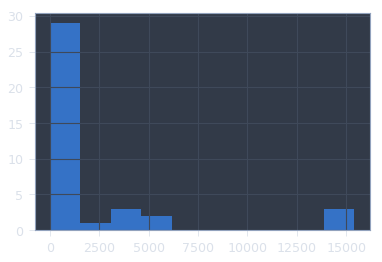

In [14]:
viz.plot_categories_per_feature(categorical_features)

Var191       2
Var192     362
Var193      51
Var194       4
Var195      23
Var196       4
Var197     226
Var198    4291
Var199    5074
Var201       3
Var202    5714
Var203       6
Var204     100
Var205       4
Var206      22
Var207      14
Var208       3
Var210       6
Var211       2
Var212      81
Var213       2
Var215       2
Var216    2016
Var218       3
Var219      23
Var220    4291
Var221       7
Var222    4291
Var223       5
Var224       2
Var225       4
Var226      23
Var227       7
Var228      30
Var229       5
dtype: int64


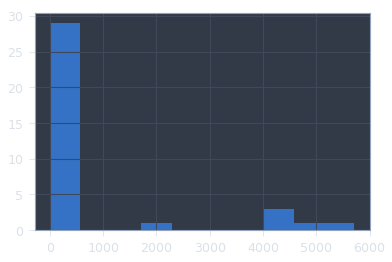

In [15]:
categorical_features = utils.drop_max_unique_features(categorical_features, 6000)
viz.plot_categories_per_feature(categorical_features)

In [16]:
features = pd.concat((numerical_features, categorical_features), axis=1)

Vamos criar agora uma cópia das features para o modelo de churn, para isso vamos usar a função get dummies do pandas que transforma nossas variáveis categóricas em one-hot encoded.

In [17]:
churn_features = pd.get_dummies(features)

In [18]:
churn_labels = pd.read_csv(path + 'orange_small_train_churn.labels', header = None)

In [19]:
churn_features = utils.feature_importance(churn_features, churn_labels)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5189           0.0059           51.97m
         2           0.5160           0.0046           55.54m
         3           0.5121           0.0030           54.39m
         4           0.5008           0.0033           53.80m
         5           0.5052           0.0024           53.11m
         6           0.4963           0.0023           52.72m
         7           0.5015           0.0021           52.08m
         8           0.5005           0.0018           51.46m
         9           0.4942           0.0012           51.25m
        10           0.4905           0.0016           51.00m
        20           0.4786           0.0006           42.97m
        30           0.4738           0.0001           37.26m
        40           0.4639           0.0001           30.48m
        50           0.4675           0.0000           24.16m
        60           0.4595          -0.0001           18.57m
       

In [20]:
churn_features.shape

(50000, 21)

# Escolha do modelo
Agora que estamos com nossas features limpas vamos testar alguns modelos para decidir qual é a melhor solução para nosso problema. Vamos testar os algoritmos abaixo:

- Regressão Logística
- Linear Discriminant Analysis
- K-nearest neighbours
- Gaussian Naive Bayes
- Support Vector Classifier
- Random Forest Classifier
- Extreme Gradient Boosting Classifier 
- Gradient Boosting Classifier


In [21]:
_, X_train, _, y_train = utils.split_dataset(churn_features, churn_labels)

In [22]:
models = utils.get_models()

In [23]:
utils.train_and_report(models, X_train, y_train)

AUC: 0.644 (+/- 0.017) [LR]
AUC: 0.676 (+/- 0.016) [LDA]
AUC: 0.518 (+/- 0.018) [KNN]
AUC: 0.533 (+/- 0.009) [CART]
AUC: 0.631 (+/- 0.009) [NB]
AUC: 0.499 (+/- 0.004) [SVC]
AUC: 0.707 (+/- 0.015) [XGB]
AUC: 0.627 (+/- 0.013) [RFC]
AUC: 0.710 (+/- 0.018) [GBC]


# Otimização do modelo
Agora que sabemos o melhor modelo para a tarefa, vamos otimizar alguns parâmetros. Para isso, vamos usar o `GridSearchCV` e testar várias combinações diferentes dos parâmetros nos modelos.

- Primeiro vamos setar o `learning_rate` para 0.1 e ir alterando um parâmetro de cada vez e escolhendo as que geram o melhor modelo.
- Depois vamos usar os parâmetros otimizados para iterar sobre os valores de `learning_rate` e `n_estimators` e buscar o melhor valor.

In [24]:
models = np.array([])
opt_params = dict()
scores = np.array([])

In [25]:
learning_rate = 0.1
n_estimators = None
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'n_estimators': range(50, 151, 10)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'n_estimators': 50} 0.7065516168383744


In [26]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [27]:
n_estimators = opt_params['n_estimators']
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'max_depth': range(3, 12, 2), 'min_samples_split': range(150, 401, 50)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_depth': 5, 'min_samples_split': 400} 0.7164252659389786


In [28]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [29]:
max_depth = opt_params['max_depth']
min_samples_split = opt_params['min_samples_split']
min_samples_leaf = None
max_features = 'sqrt'
subsample = 0.8
params = {'min_samples_leaf': range(25, 61, 5)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'min_samples_leaf': 25} 0.7148088715163713


In [30]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [31]:
min_samples_leaf = opt_params['min_samples_leaf']
max_features = None
subsample = 0.8
params = {'max_features': range(10, 21, 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_features': 14} 0.7132701160713315


In [32]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [33]:
max_features = opt_params['max_features']
subsample = None
params = {'subsample': np.append(np.arange(0.6, 1, 0.05), 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'subsample': 0.8000000000000002} 0.7132701160713315


In [34]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [35]:
subsample = opt_params['subsample']
learning_rate = 0.1
n_estimators = opt_params['n_estimators']

models, scores = utils.gbc_lr_optimizer(X_train, y_train, n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        min_samples_split = min_samples_split,
                                        min_samples_leaf = min_samples_leaf,
                                        max_depth = max_depth,
                                        max_features = max_features,
                                        subsample = subsample,
                                        params = params)

n_estimators: 100 | learning_rate: 0.05 | score: 0.7099633890734823
n_estimators: 500 | learning_rate: 0.01 | score: 0.7116183073448002
n_estimators: 1000 | learning_rate: 0.005 | score: 0.7125122212085663
n_estimators: 5000 | learning_rate: 0.001 | score: 0.7129195612219016


In [36]:
models = np.append(models, models)
scores = np.append(scores, scores)

In [37]:
print('Best performance: {} | Model: {}'.format(max(scores), scores.argmax()))

Best performance: 0.7129195612219016 | Model: 3


# Treinando o modelo final
Com os parâmetros otimizados vamos treinar e salvar o modelo final e medir o score do modelo.

In [38]:
X_train, X_test, y_train, y_test = utils.split_dataset(churn_features, churn_labels)

In [39]:
churn_model = models[scores.argmax()]
churn_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=5,
              max_features=14, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=25, min_samples_split=400,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.8000000000000002, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
utils.save_model(churn_model, 'final_churn_model.sav')

In [41]:
churn_predictions = churn_model.predict_proba(X_test)
roc_auc_score(y_test, churn_predictions[:, 1])

0.72906838807724

# Appetency

Copia features para appetency e transforma em one-hot encoded

In [42]:
appetency_features = pd.get_dummies(features)

In [43]:
appetency_labels = pd.read_csv(path + 'orange_small_train_appetency.labels', header = None)

### Feature importance

In [44]:
appetency_features = utils.feature_importance(appetency_features, appetency_labels)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1682           0.0071           52.78m
         2           0.1644           0.0037           52.16m
         3           0.1567           0.0022           51.63m
         4           0.1572           0.0020           51.08m
         5           0.1539           0.0018           51.20m
         6           0.1572           0.0003           49.32m
         7           0.1523           0.0004           48.93m
         8           0.1505           0.0009           47.62m
         9           0.1515           0.0007           47.62m
        10           0.1534           0.0004           47.26m
        20           0.1463          -0.0013           38.08m
        30      185832.0678          -0.0015           30.38m
        40           0.2044          -0.0011           24.33m
        50      189405.1360          -0.0042           19.36m
        60      287131.6303           0.0000           15.07m
       

In [45]:
appetency_features.shape

(50000, 29)

### Escolha do modelo

In [46]:
# Get a small subset (20%) just to check the classifiers
_, X_train, _, y_train = utils.split_dataset(appetency_features, appetency_labels)

In [47]:
models = utils.get_models()

In [48]:
utils.train_and_report(models, X_train, y_train)

AUC: 0.462 (+/- 0.030) [LR]
AUC: 0.789 (+/- 0.019) [LDA]
AUC: 0.497 (+/- 0.027) [KNN]
AUC: 0.525 (+/- 0.014) [CART]
AUC: 0.684 (+/- 0.033) [NB]
AUC: 0.499 (+/- 0.006) [SVC]
AUC: 0.768 (+/- 0.032) [XGB]
AUC: 0.600 (+/- 0.017) [RFC]
AUC: 0.777 (+/- 0.036) [GBC]


### Otimização do modelo

In [49]:
models = np.array([])
opt_params = dict()
scores = np.array([])

In [50]:
learning_rate = 0.1
n_estimators = None
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'n_estimators': range(50, 151, 10)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'n_estimators': 60} 0.7611950915583865


In [51]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [52]:
n_estimators = opt_params['n_estimators']
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'max_depth': range(3, 12, 2), 'min_samples_split': range(150, 401, 50)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_depth': 3, 'min_samples_split': 250} 0.7696990962326933


In [53]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [54]:
max_depth = opt_params['max_depth']
min_samples_split = opt_params['min_samples_split']
min_samples_leaf = None
max_features = 'sqrt'
subsample = 0.8
params = {'min_samples_leaf': range(25, 61, 5)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'min_samples_leaf': 25} 0.7717127293463365


In [55]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [56]:
min_samples_leaf = opt_params['min_samples_leaf']
max_features = None
subsample = 0.8
params = {'max_features': range(10, 21, 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_features': 19} 0.7708326537680674


In [57]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [58]:
max_features = opt_params['max_features']
subsample = None
params = {'subsample': np.append(np.arange(0.6, 1, 0.05), 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'subsample': 1.0} 0.7726201174022259


In [59]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [60]:
subsample = opt_params['subsample']
learning_rate = 0.1
n_estimators = opt_params['n_estimators']

models, scores = utils.gbc_lr_optimizer(X_train, y_train, n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        min_samples_split = min_samples_split,
                                        min_samples_leaf = min_samples_leaf,
                                        max_depth = max_depth,
                                        max_features = max_features,
                                        subsample = subsample,
                                        params = params)

n_estimators: 120 | learning_rate: 0.05 | score: 0.7685942388906041
n_estimators: 600 | learning_rate: 0.01 | score: 0.7715951402888406
n_estimators: 1200 | learning_rate: 0.005 | score: 0.771099922293681
n_estimators: 6000 | learning_rate: 0.001 | score: 0.7720042042355516


In [61]:
models = np.append(models, models)
scores = np.append(scores, scores)

In [62]:
print('Best performance: {} | Model: {}'.format(max(scores), scores.argmax()))

Best performance: 0.7720042042355516 | Model: 3


### Treinando modelo final

In [63]:
X_train, X_test, y_train, y_test = utils.split_dataset(appetency_features, appetency_labels)

In [64]:
appetency_model = models[scores.argmax()]
appetency_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=19, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=25, min_samples_split=250,
              min_weight_fraction_leaf=0.0, n_estimators=6000,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [65]:
utils.save_model(appetency_model, 'final_appetency_model.sav')

In [66]:
appetency_predictions = appetency_model.predict_proba(X_test)
roc_auc_score(y_test, appetency_predictions[:, 1])

0.793372307980937

# Upselling

In [67]:
upselling_features = pd.get_dummies(features)

In [68]:
upselling_labels = pd.read_csv(path + 'orange_small_train_upselling.labels', header = None)

### Feature importance

In [69]:
upselling_features = utils.feature_importance(upselling_features, upselling_labels)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4601           0.0630           53.69m
         2           0.4318           0.0239           53.45m
         3           0.4181           0.0165           52.68m
         4           0.4082           0.0122           52.53m
         5           0.3960           0.0101           51.92m
         6           0.3890           0.0077           51.60m
         7           0.3786           0.0066           50.84m
         8           0.3739           0.0056           50.02m
         9           0.3716           0.0048           49.42m
        10           0.3678           0.0038           48.71m
        20           0.3465           0.0007           42.15m
        30           0.3391           0.0002           36.36m
        40           0.3272          -0.0001           30.62m
        50           0.3255          -0.0000           24.58m
        60           0.3251          -0.0009           19.01m
       

In [70]:
upselling_features.shape

(50000, 8)

### Escolha do modelo

In [71]:
# Get a small subset (20%) just to check the classifiers
_, X_train, _, y_train = utils.split_dataset(upselling_features, upselling_labels)

In [72]:
models = utils.get_models()

In [73]:
utils.train_and_report(models, X_train, y_train)

AUC: 0.669 (+/- 0.028) [LR]
AUC: 0.772 (+/- 0.024) [LDA]
AUC: 0.556 (+/- 0.022) [KNN]
AUC: 0.676 (+/- 0.014) [CART]
AUC: 0.649 (+/- 0.025) [NB]
AUC: 0.504 (+/- 0.003) [SVC]
AUC: 0.856 (+/- 0.012) [XGB]
AUC: 0.768 (+/- 0.026) [RFC]
AUC: 0.855 (+/- 0.012) [GBC]


### Otimização do modelo

In [74]:
models = np.array([])
opt_params = dict()
scores = np.array([])

In [75]:
learning_rate = 0.1
n_estimators = None
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'n_estimators': range(50, 151, 10)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, 
                                                     n_estimators = n_estimators,
                                                     learning_rate = learning_rate,
                                                     min_samples_split = min_samples_split,
                                                     min_samples_leaf = min_samples_leaf,
                                                     max_depth = max_depth,
                                                     max_features = max_features,
                                                     subsample = subsample,
                                                     params = params)

{'n_estimators': 60} 0.8538809049011364


In [76]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [77]:
n_estimators = opt_params['n_estimators']
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'max_depth': range(3, 12, 2), 'min_samples_split': range(150, 401, 50)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_depth': 5, 'min_samples_split': 150} 0.858083469528206


In [78]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [79]:
max_depth = opt_params['max_depth']
min_samples_split = opt_params['min_samples_split']
min_samples_leaf = None
max_features = 'sqrt'
subsample = 0.8
params = {'min_samples_leaf': range(25, 61, 5)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'min_samples_leaf': 25} 0.8569374529002071


In [80]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [82]:
min_samples_leaf = opt_params['min_samples_leaf']
max_features = None
subsample = 0.8
params = {'max_features': range(1, 8, 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'max_features': 5} 0.8577026135684193


In [83]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [84]:
max_features = opt_params['max_features']
subsample = None
params = {'subsample': np.append(np.arange(0.6, 1, 0.05), 1)}

model, opt_param, score = utils.gbc_params_optimizer(X_train, y_train, n_estimators = n_estimators,
                                               learning_rate = learning_rate,
                                               min_samples_split = min_samples_split,
                                               min_samples_leaf = min_samples_leaf,
                                               max_depth = max_depth,
                                               max_features = max_features,
                                               subsample = subsample,
                                               params = params)

{'subsample': 0.8000000000000002} 0.8577026135684193


In [85]:
models = np.append(models, model)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [86]:
subsample = opt_params['subsample']
learning_rate = 0.1
n_estimators = opt_params['n_estimators']

models, scores = utils.gbc_lr_optimizer(X_train, y_train, n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        min_samples_split = min_samples_split,
                                        min_samples_leaf = min_samples_leaf,
                                        max_depth = max_depth,
                                        max_features = max_features,
                                        subsample = subsample,
                                        params = params)

n_estimators: 120 | learning_rate: 0.05 | score: 0.858756935796379
n_estimators: 600 | learning_rate: 0.01 | score: 0.8583058307362341
n_estimators: 1200 | learning_rate: 0.005 | score: 0.8579131210557762
n_estimators: 6000 | learning_rate: 0.001 | score: 0.8583673014822839


In [87]:
models = np.append(models, models)
scores = np.append(scores, scores)

In [88]:
print('Best performance: {} | Model: {}'.format(max(scores), scores.argmax()))

Best performance: 0.858756935796379 | Model: 0


### Treinando modelo final

In [89]:
X_train, X_test, y_train, y_test = utils.split_dataset(upselling_features, upselling_labels)

In [90]:
upselling_model = models[scores.argmax()]
upselling_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=25, min_samples_split=150,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=0.8000000000000002, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
utils.save_model(upselling_model, 'final_upselling_model.sav')

In [92]:
upselling_predictions = upselling_model.predict_proba(X_test)
roc_auc_score(y_test, upselling_predictions[:, 1])

0.8644662220986333

# Conclusão
Atingimos um score médio de 0.7956 (churn: 0.7290, appetency: 0.7933, upselling: 0.8644) o que nos posicionaria na 39ª posição na competição, o que é uma posição relativamente boa, considerando que muitas submissões para competição foram feitas por especialistas em grandes empresas com recursos ilimitados e mais tempo em suas mãos. E de fato, em um cenário de negócios uma predição de churn com >70% de confiança já é um percentual considerável.

### O que poderia ter sido melhor?
- O dataset é anonimizado e as variáveis são renomeadas para `var_n` por tanto não sabemos a que se refere cada variável. Poderíamos obter um melhor resultado se soubéssemos do que se trata cada uma, além de nos permitir ter uma visão de negócios sobre o algoritmo que estamos usando. Por exemplo, poderíamos calcular os _SHAP values_ de diferentes variáveis para entender como cada uma afeta a experiência do cliente e sua chance de churnar, fazer um upsell ou comprar novos produtos.
    - Suponhamos que, no exemplo abaixo, a variável var21 se refere ao NPS (Net Promoter Score, uma métrica de satisfação do cliente). Plotando o gráfico dos valores SHAP vemos que claramente um valor baixo de NPS está relacionado com churn. Podemos então fazer um estudo mais aprofundado para o melhoramento do nosso atendimento ao cliente, aumentando o NPS e, por consequencia, diminuindo o churn.
- Poderíamos ter calculado as _Feature Importances_ através de _Permutation Importance_. Onde embaralhamos os valores de uma coluna de cada vez e avaliamos quanto aquela coluna afeta nossas predições **isoladamente**. Os valores que tiverem o maior peso representam as features mais importantes e os com menos peso, as menos importantes. 
- Utilizamos o `GradientBoostingClassifier` para todos os modelos finais, contudo no treinamento de upselling o `XGBClassifier` obteve um score consideravelmente mais alto. Mas optei por usar o GBC e desconsiderar a diferença para facilitar o treinamento, já que o utilizamos nos demais modelos. Dado mais tempo e recursos, acredito que o XGB teria nos fornecido uma performance melhor.
- Poderíamos ter levado em conta valores faltantes nas variáveis numéricas colocando, para cada uma delas, um novo indicador binário. Dessa maneira podemos considerar a falta dessa informação como um fator preditivo através de novas variáveis categóricas.
- Por fim, poderíamos ter utilizado os resultados dos _SHAP Values_ e das _Permutation Importances_ para nos guiar na construção de novas features que poderiam nos fornecer uma predição melhor.


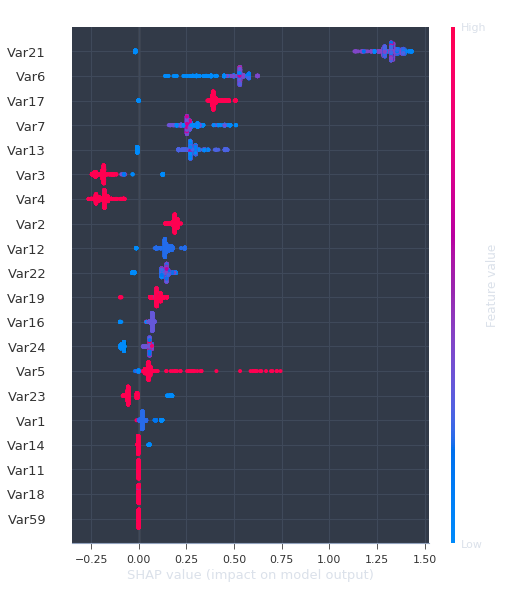

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)